Olá, 

Meu nome é Ramon. Ao ao longo do texto farei algumas observações sobre melhorias no código. Nas partes em que não houver comentários, está tudo certo, ok? Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser consertado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

###

<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho.

Como pontos fortes do projeto, destaco:
- Código simples e eficiente (sem loop desnecessário)
- Uso adequado dos recursos da lição
- Bons gráficos
    
Há alguns pequenos ajustes a fazer. Deixei dicas. Conte conosco.
Desejo sucesso na jornada.

</div>



<div class="alert alert-block alert-success">
<b> Comentário Geral do revisor V2: </b> <a class="tocSkip"></a>

Tudo certo agora, porém faltou recortar a base a partir de 2013. Desejo sucesso na jornada. Parabéns pelo empenho.
</div>

# Análise de dados para desenvolvimento de publicidade para loja Ice.

Thaynnan Aurick Silva e Souza.

Data: 31/10/2024.

# 1 Bibliotecas.

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np

# 2  Lendo os dados.

In [2]:
# Fazendo o carregamento dos dados.
df = pd.read_csv("/datasets/games.csv")
df.head() # sanity check

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# 3  Informações gerais.

In [3]:
# Obtendo informações dos dados carregados.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


* Foi notado uma falta de padronização nos dados.
* 'User_score' encontra-se no tipo 'object' quando devia estar como 'float'.
* 'Year_of_realease' tem valores nulas e encontra-se como 'float' quando os esperado devia ser 'int', irei investigar posteriormente.

# 3.2 Fazendo alterações nos dados

In [4]:
# Convertendo nomes de colunas de maiúsculo para minúsculos
df.columns = df.columns.str.lower()

In [5]:
# Confirmando alterações.
df.head()# sanity check

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# 3.3 Convertendo dados para os tipos necessários.

In [6]:
# Tratando a coluna 'user_score'.
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'].astype(float)

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: float64

A coluna 'user_score' era do tipo 'object' porque existiam strings 'tbd'( to be determined) nessa coluna.

In [7]:
# Fazendo cálculos para saber se e possível removê-los
qtd_valores_ausentes = df[['name', 'year_of_release']].isna().sum().sum()
qtd_de_exemplos = df.shape[0]

print(f'A base de dados tem {qtd_de_exemplos} linhas e {qtd_valores_ausentes} delas valores ausentes.')
print(f'Como os valores ausentes representam apenas {qtd_valores_ausentes/qtd_de_exemplos:.2%} dos dados, irei removê-los.')

A base de dados tem 16715 linhas e 271 delas valores ausentes.
Como os valores ausentes representam apenas 1.62% dos dados, irei removê-los.


In [8]:
# Excluindo valores ausentes.
# Convertendo o tipo da coluna de 'float' para 'int'.
df = df.dropna(subset=['name','year_of_release'])
df['year_of_release'] = df['year_of_release'].astype(int)

<s>
<div class="alert alert-block alert-danger">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Não convém descartar nan 





### Resposta do aluno:
Neste caso eu segui a o Webnar anterior, ja que inicialmente eu pensei em fazer uma subtituição dos valores ausentes, porém na aula foi dito que por ser um valor baixo se comparado com o total poderia ser descartado.

# 4 Cálculando o total de  vendas.

In [9]:
# Somando os valores de vendas de todas as regiões e criando uma nova coluna chamada 'total_sales' com esse valor.
df['total_sales'] = df['na_sales'] + df['jp_sales'] + df['eu_sales'] + df['other_sales']

# 5 Cálculando a quantidade de jogos lançados ano a ano.

<AxesSubplot:xlabel='year_of_release'>

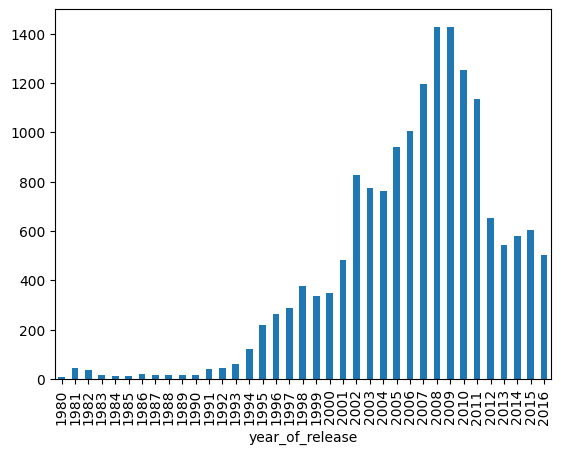

In [10]:
# Fazendo cálculos de lançamento por ano e transformando em gráficos para melhor leitura.
games_per_year = df.groupby('year_of_release').size()
games_per_year.head(38).plot(kind='bar')

# Observações
E possível notar atravez do gráfico um forte aumento nos lançamentos de jogos dos anos 2002 ao ano de 2011, com seu pico entre os anos de 2007 a 2010.

# 6 Cálculando a quantidade de jogos lançados por plataforma.

<AxesSubplot:xlabel='platform'>

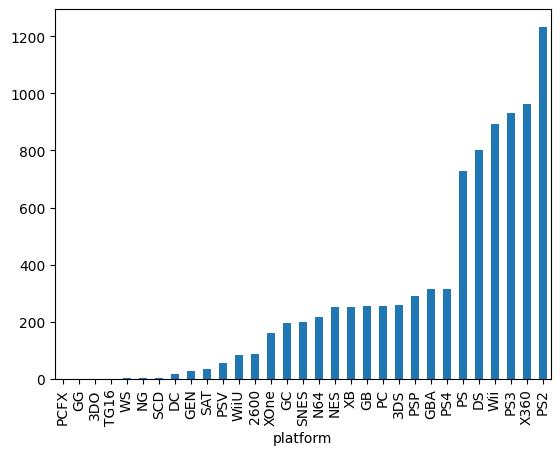

In [11]:
# Fazendo cálculos de vendas por plataforma e transformando em gráficos para melhor leitura.
sell_per_platform = df.groupby('platform')['total_sales'].sum()
sell_per_platform.sort_values().head(50).plot(kind='bar')

# 7 Selecionando as 5 plataformas que mais venderam ('PS2', 'X360', 'PS3','XOne','PS4').

In [12]:
df_grouped_top_5 = df.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()
df_grouped_top_5 = df_grouped_top_5[df_grouped_top_5['platform'].isin(['PS2', 'X360', 'PS3','XOne','PS4'])]

# 8 Cálculando o tempo médio de relevancia de uma plataforma.

In [13]:
# Agrupando dados e tirando seus valores mínimos e maxímos e cálculando sua média.
df_grouped_live = df.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()
df_grouped_live['life_time'] = df_grouped_live['max'] - df_grouped_live['min'] 
df_grouped_life_mean = df_grouped_live['life_time'].mean()
print(f'O tempo médio de vida de uma plataforma e de {df_grouped_life_mean:.3} anos.')

O tempo médio de vida de uma plataforma e de 7.61 anos.


* Quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem?

O periodo de relevância de uma plataforma foi determinado como sendo de 7 anos em média, e por isso este tempo será o ultilizado.

# 10 Separnado os dados relevantes.

In [14]:
# Filtrando os dados das 3 plataformas que mais venderam (PS3, PS2, X360), nos anos relevantes (2009 a 2016)
df_filtered = df[(df['year_of_release'] > 2008) & (df['year_of_release'] < 2017) & (df['platform'].isin(['PS2', 'X360', 'PS3']))].reset_index()
df_filtered = df_filtered.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()


<div class="alert alert-block alert-danger">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Precisa recortar ano >= 2013 pois dados de preferências mudam com o tempo
</div>






### Resposta do aluno: 
Neste ponto usei a referencia que tirei na questão acima que me apontou que o tempo de relevância médio seria de 7 anos, por isso utilizei os dados referentes a 7 anos de 2009 a 2016.
Eu me equivoquei nessa nessa interpretação ?

In [15]:
# Filtrando dados dos anos relevantes.
df_filter = df[(df['year_of_release'] > 2008) & (df['year_of_release'] < 2017)]
df_sales = df_filter.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

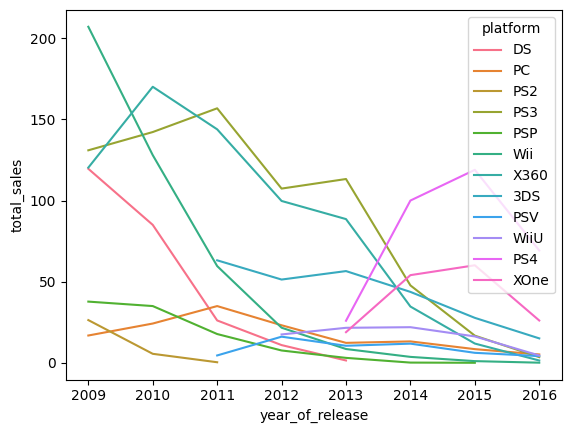

In [16]:
# Gerando gráfico para melhor vizualização.
import seaborn as sns
sns.lineplot(
  data=df_sales,
  x='year_of_release',
  y='total_sales',
  hue='platform',
)

# 11 Reunindo dados sobre vendas e interpretando.

* Quais plataformas estão liderando em vendas?


As plataforma que estão liderando as vendas atualmente são:
XOne e PS4.

* Quais estão crescendo ou diminuindo?

É possível notar um crescimento nas plataformas:
XOne e PS4.
É podemos observar um decrescimento nas plataformas:
PS3, DSV e X360.

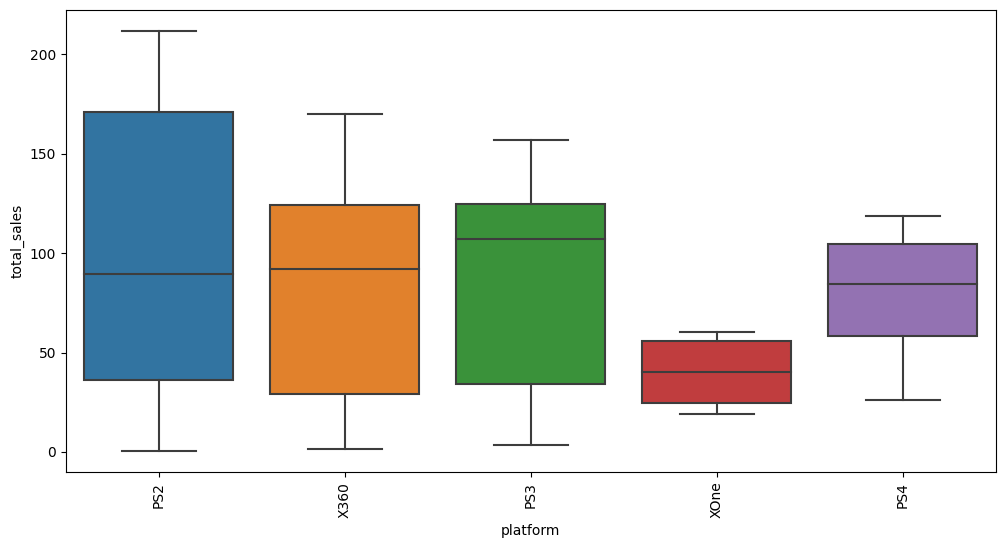

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.tight_layout()
sns.boxplot(data = df_grouped_top_5.sort_values('year_of_release'), y='total_sales', x='platform');
plt.xticks(rotation=90);

* As diferenças nas vendas são significativas? E quanto às vendas médias em várias plataformas? Descreva suas descobertas.

É possivel notar uma diferença nas vendas médias nas plataformas mais recentes.
Tendo que a média de vendas das plataformas mais antigas e maior porém os dados mais acima sugerem um aumento nas vendas das plataformas mais recentes em detrerimento as mais antigas.

# 12 Comparando relação entre avaliações e vendas totais.

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

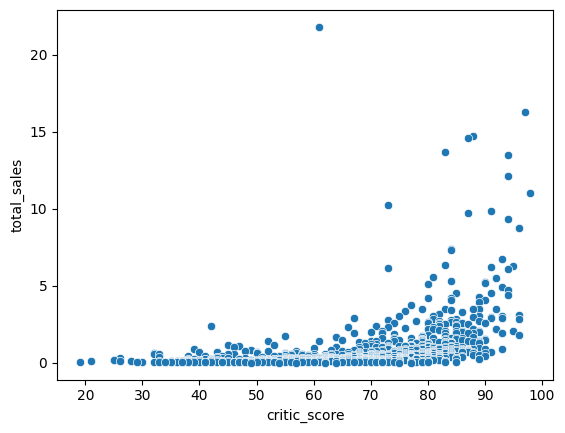

In [18]:
# Gerando gráfico de dispersão para plataforma "X360".
df_X360 = df[(df['platform'].isin(['X360'])) & (df['critic_score'].notna())]
sns.scatterplot(data=df_X360, x='critic_score', y='total_sales')

In [19]:
# Gerando o calculo de correlação para "X360".
correlation_test_X360 = df_X360['critic_score'].corr(df_X360['total_sales'])
print(correlation_test_X360)

0.39286589254006965


O resultado acima mostra uma correlação moderada, o que indica que há um grau de correlação, porém não e forte o suficiente para que as avaliações sejam considerado um fator crucial.

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

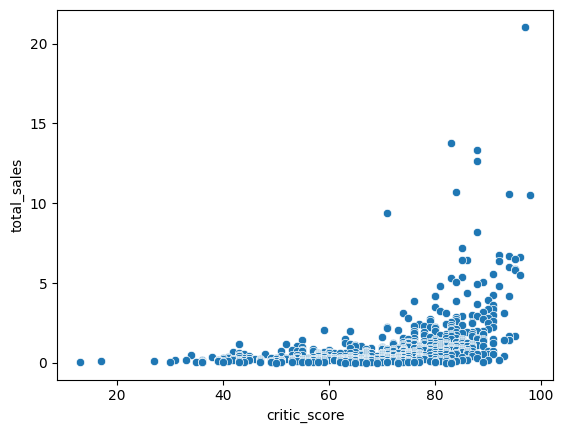

In [20]:
# Gerando gráfico de dispersão para plataforma "PS3".
df_PS3 = df[(df['platform'].isin(['PS3'])) & (df['user_score'].notna())]
sns.scatterplot(data=df_PS3, x='critic_score', y='total_sales')

In [21]:
# Gerando o calculo de correlação para "PS3".
correlation_test_PS3 = df_PS3['critic_score'].corr(df_PS3['total_sales'])
print(correlation_test_PS3)

0.428212904129884


* Veja como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular.

É possível notar que nos dois casos testados acima a correlção entre as vendas e as críticas se mostraram fracas sendo elas:
Na plataforma "X360" o valor da correlção foi de (0.42) e para "PS3" foi de (0.39) o que se considera baixo, demonstrando que não há uma correlação forte entre as avaliações dos usúarios e suas vendas.

# 13 Calculando vendas por gêneros.

<AxesSubplot:xlabel='genre'>

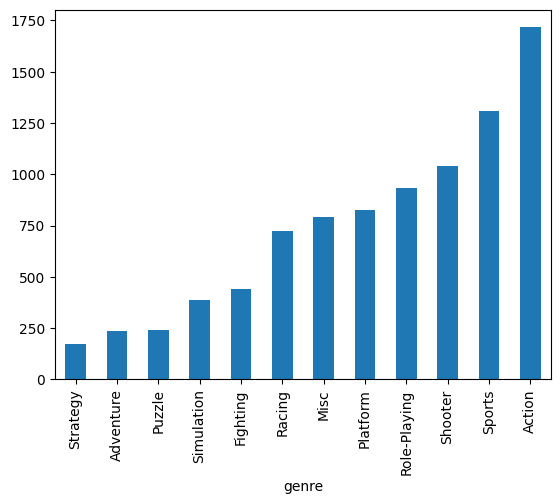

In [22]:
# Agrupando informações relevantes e gerando grafico com resultados.
sell_per_genre = df.groupby('genre')['total_sales'].sum()
sell_per_genre.sort_values().head(50).plot(kind='bar')

* O que podemos dizer sobre os gêneros mais lucrativos? Você pode generalizar sobre gêneros com vendas altas e baixas?

Atravéz do gráfico podemos observar que os gêneros que mais lucrativos foram o de (Action, Sports, Shooter, Role_Playing e Platform).

# 14 Organizando vendas de plataformas por região.

* As cinco plataformas principais. Descreva as variações das suas quotas de mercado de região para região.

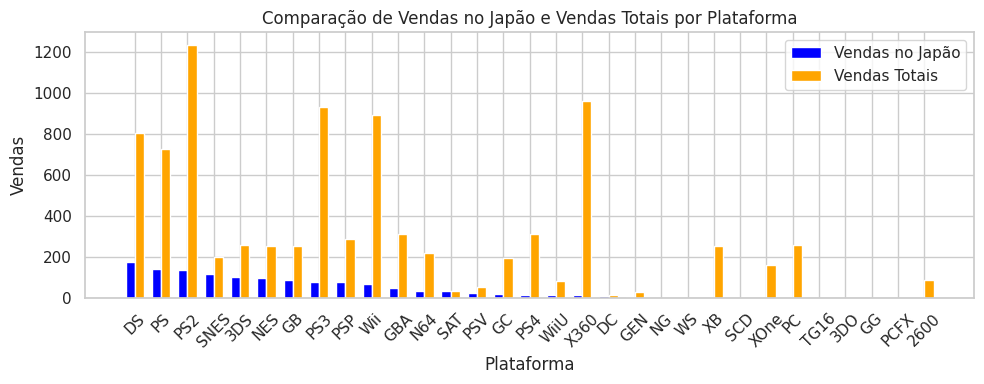

In [23]:
# Agrupando e fazendo cálculos da vendas por plataforma no região do Japão.
df_platform_jp = df.copy()
df_platform_jp = df_platform_jp[['platform', 'jp_sales', 'total_sales']].groupby('platform').sum().reset_index()
df_platform_jp['quotas_region'] = df_platform_jp['jp_sales'] / df_platform_jp['total_sales']
df_platform_jp = df_platform_jp.sort_values('jp_sales', ascending=False)

sns.set(style="whitegrid")

# Criando o gráfico de barras
plt.figure(figsize=(10, 4))
bar_width = 0.35
index = range(len(df_platform_jp))

# Barras para jp_sales
plt.bar(index, df_platform_jp['jp_sales'], bar_width, label='Vendas no Japão', color='blue')

# Barras para total_sales
plt.bar([i + bar_width for i in index], df_platform_jp['total_sales'], bar_width, label='Vendas Totais', color='orange')

# Adicionando rótulos e título
plt.xlabel('Plataforma')
plt.ylabel('Vendas')
plt.title('Comparação de Vendas no Japão e Vendas Totais por Plataforma')
plt.xticks([i + bar_width / 2 for i in index], df_platform_jp['platform'], rotation=45)
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()

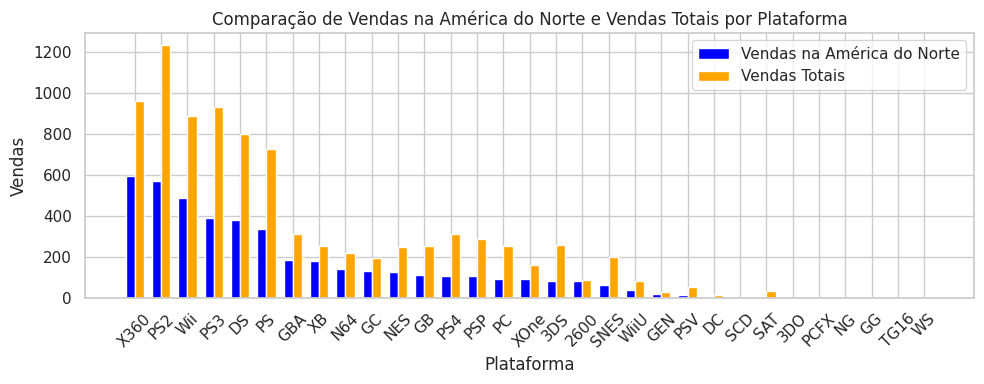

In [24]:
# Agrupando e fazendo cálculos da vendas por plataforma no região dos EUA.
df_platform_na = df.copy()
df_platform_na = df_platform_na[['platform', 'na_sales', 'total_sales']].groupby('platform').sum().reset_index()
df_platform_na['quotas_region'] = df_platform_na['na_sales'] / df_platform_na['total_sales']
df_platform_na = df_platform_na.sort_values('na_sales', ascending=False)

sns.set(style="whitegrid")

# Criando o gráfico de barras
plt.figure(figsize=(10, 4))
bar_width = 0.35
index = range(len(df_platform_na))

# Barras para na_sales
plt.bar(index, df_platform_na['na_sales'], bar_width, label='Vendas na América do Norte', color='blue')

# Barras para total_sales
plt.bar([i + bar_width for i in index], df_platform_na['total_sales'], bar_width, label='Vendas Totais', color='orange')

# Adicionando rótulos e título
plt.xlabel('Plataforma')
plt.ylabel('Vendas')
plt.title('Comparação de Vendas na América do Norte e Vendas Totais por Plataforma')
plt.xticks([i + bar_width / 2 for i in index], df_platform_na['platform'], rotation=45)
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()

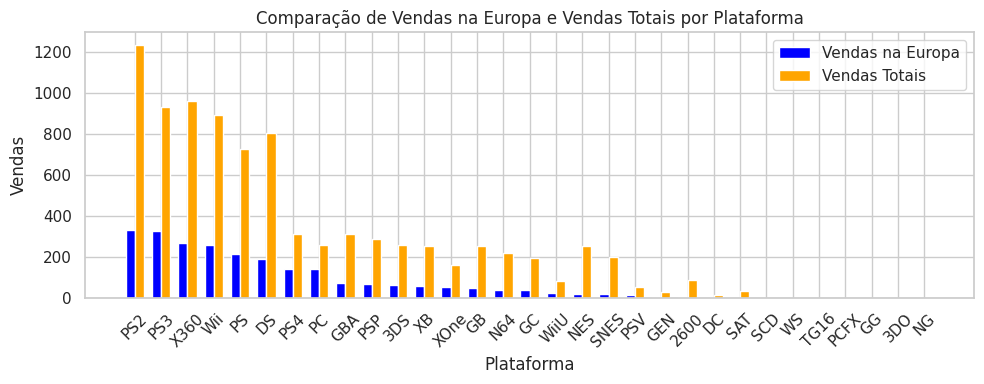

In [25]:
# Agrupando e fazendo cálculos da vendas por plataforma na região da Europa.
df_platform_eu = df.copy()
df_platform_eu = df_platform_eu[['platform', 'eu_sales', 'total_sales']].groupby('platform').sum().reset_index()
df_platform_eu['quotas_region'] = df_platform_eu['eu_sales'] / df_platform_eu['total_sales']
df_platform_eu = df_platform_eu.sort_values('eu_sales', ascending=False)

sns.set(style="whitegrid")

# Criando o gráfico de barras
plt.figure(figsize=(10, 4))
bar_width = 0.35
index = range(len(df_platform_eu))

# Barras para eu_sales
plt.bar(index, df_platform_eu['eu_sales'], bar_width, label='Vendas na Europa', color='blue')

# Barras para total_sales
plt.bar([i + bar_width for i in index], df_platform_eu['total_sales'], bar_width, label='Vendas Totais', color='orange')

# Adicionando rótulos e título
plt.xlabel('Plataforma')
plt.ylabel('Vendas')
plt.title('Comparação de Vendas na Europa e Vendas Totais por Plataforma')
plt.xticks([i + bar_width / 2 for i in index], df_platform_eu['platform'], rotation=45)
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()

# conclusões

Foi possível constatar atravez dos dados abaixo que:

Na região da Europa as principais plataformas que se destacaram foram;

PS2 (26.9%)
PS3  (35.1%)
X360 (27.9%)
Wii (28.9%)
PS (29.1%).

No Estados Unidos as plataformas que se destacaram foram;

X360 (61.9%)
PS2 (46.4%)
Wii (54.6%)
PS3 (41.8%)
DS (47.3%)

Ja no Japão as principais plataformas foram;

DS (21.8%)
PS (19.2%)
PS2 (11.1%)
SNES (58.2%)
3DS (39%)

(Organizados em ordem crescente de vendas totais por região)

Plataformas populares nos EUA:
O X360 ficou em primeiro lugar com uma diferença relevante perante os demais concorrentes e ficando 61.9% das vendas totais sendo realizadas somente nos EUA, em segundo lugar temos o PS2 com ótimas vendas totais porém suas vendas foram mais destribuidas entre as demais regiões, a plataforma Wii teve uma otima dominancia na região tendo de suas vendas totais 54.1% sendo realizadas somente nos EUA, seguido pelas plataformas PS3 e DS com 41.9% e 47.3% respectivamente.

Plataformas mais populares na Europa:
O PS2 ficou com o primeiro lugar nas vendas totais, dentre estas 26.9% foram realizadas na Europa, seguido pelo PS3 com 35% das vendas realizadas na região, outras que obtiveram exito em vendas foram X360, Wii e PS com menores vendas totais porém boa dominancia matendo sua participação nas vendas acima de 27% do total. 

Plataformas populares no Japão :
Em primeiro lugar temos o DS que manteve um elevado número de vendas locais com uma dominancia de 21.8%, seguido da plataforma PS que támbem teve bons número de vendas na região com 19.2%, seguido pelo PS2 que obteve bons números de vendas porem menor dominância local de 11%, e excepcionalmente temos o caso do SNES que tem um dominância absoluta em vendas no Japão, ja que não obteve um grande sucesso nas demais regiões de lancamento, algo parecido acontece com o 3DS que teve uma boa dominância no Japão e pouco destaque nas demais regiões.



<s>
<div class="alert alert-block alert-danger">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

 Não há gráficos nem conclusões.

</div>


# 15 Organizando vendas de gêneros especificos por região.

* Os cinco principais gêneros. Explique a diferença.

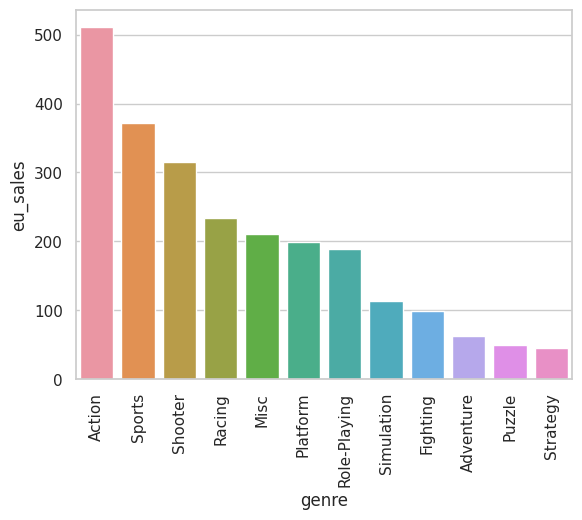

In [26]:
# Agrupando e fazendo cálculos das vendas por gênero na região da Europa.
df_genre_eu = df.copy()
df_genre_eu = df_genre_eu[['genre', 'eu_sales']].groupby('genre').sum().reset_index().sort_values('eu_sales', ascending=False)
sns.barplot(data=df_genre_eu, x='genre', y='eu_sales')
plt.xticks(rotation= 90);

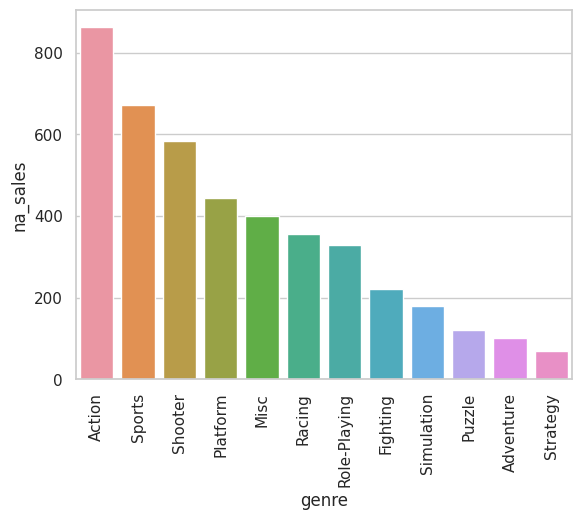

In [27]:
# Agrupando e fazendo cálculos das vendas por gênero na região dos EUA.
df_genre_na = df.copy()
df_genre_na = df_genre_na[['genre', 'na_sales']].groupby('genre').sum().reset_index().sort_values('na_sales', ascending=False)
sns.barplot(data=df_genre_na, x='genre', y='na_sales')
plt.xticks(rotation= 90);

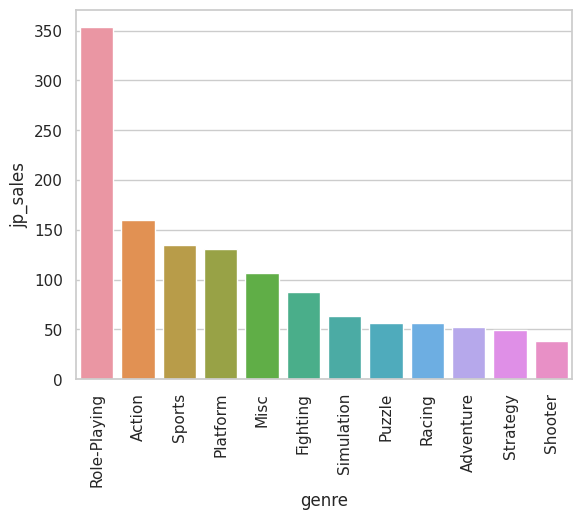

In [28]:
# Agrupando e fazendo cálculos das vendas por gênero na região do Japão.
df_genre_jp = df.copy()
df_genre_jp = df_genre_jp[['genre', 'jp_sales']].groupby('genre').sum().reset_index().sort_values('jp_sales', ascending=False)
sns.barplot(data=df_genre_jp, x='genre', y='jp_sales')
plt.xticks(rotation= 90);

# conclusões

Na observação das vendas por gêneros nas 3 regiões foi póssivel notar que estes se mantem parecidos somente com ligeiras diferenças no Japão.
Os principais gêneros são:
Action, Sports, Shooter, Racing, Misc e Role_Playing(que se destaca no Japão).

Na Europa a lista dos 5 gêneros que mais venderam foram:
1 Action, 2 Sports, 3 Shooter, 4 Racing, 5 Misc.

Nos EUA a lista ficou:
1 Action, 2 Sports, 3 Shooter, 4 Platform, 5 Misc.

No Japão tivemos:
1 Role-Playing, 2 Action, 3 Sports, 4 Platform, 5 Misc.

<s>
<div class="alert alert-block alert-danger">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

 Não há gráficos nem conclusões.

</div>


# 16 Organizando vendas por classificação.

As classificações do ESRB afetam as vendas em regiões individuais?

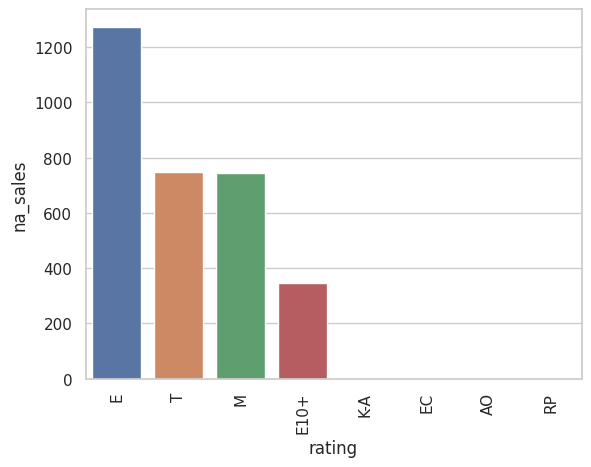

In [29]:
# Agrupando por rating e fazendo cálculos de vendas pela região do EUA.
df_rating_na = df.copy()
df_rating_na = df_rating_na[['rating', 'na_sales']].groupby('rating').sum().reset_index().sort_values('na_sales', ascending=False)
sns.barplot(data=df_rating_na, x='rating', y='na_sales')
plt.xticks(rotation= 90);

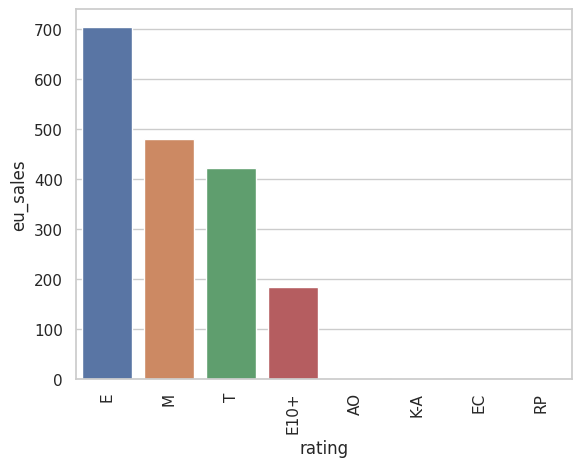

In [30]:
# Agrupando por rating e fazendo cálculos de vendas pela região da Europa.
df_rating_eu = df.copy()
df_rating_eu = df_rating_eu[['rating', 'eu_sales']].groupby('rating').sum().reset_index().sort_values('eu_sales', ascending=False)
sns.barplot(data=df_rating_eu, x='rating', y='eu_sales')
plt.xticks(rotation= 90);

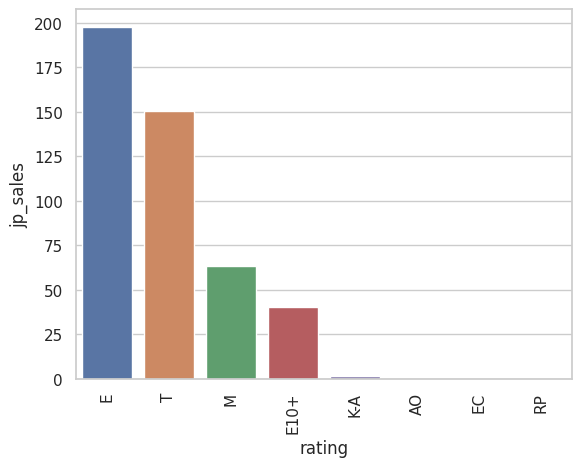

In [31]:
# Agrupando por rating e fazendo cálculos de vendas pela região do Japão.
df_rating_jp = df.copy()
df_rating_jp = df_rating_jp[['rating', 'jp_sales']].groupby('rating').sum().reset_index().sort_values('jp_sales', ascending=False)
sns.barplot(data=df_rating_jp, x='rating', y='jp_sales')
plt.xticks(rotation= 90);

# conclusões

E póssivel notar que a cátegoria E(Maiores de 6 anos), obteve a maior parte das vendas totais e ficou na primeira posição em todas as regiões ja que essa classificação e mais abrangente em seu público.
As classificações T(Maiores de 13 anos), M(Maiores de 17 anos) e E+10(Maiores de 10 anos) se mantiveram entre segundo, terceira e quarta posição das vendas nas 3 regiões, na quinta posição houve uma variação, no Japão e nos EUA a classificação K-A (Maiores de 6 anos depreciada)ficou com a quinta posição, ja na Europa a quinta posição ficou com a clasificação AO(Maiores de 18 anos), Mostrando que há uma variação de vendas nas classificações que abrangem maior público entre as regiões.

<s>
<div class="alert alert-block alert-danger">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

 Não há gráficos nem conclusões.

</div>


# 17 Teste de Hipóteses.

In [32]:
# Fazendo a filtragem de dados dos PC.
score_pc = df.copy()
score_pc = score_pc[(score_pc['platform'] == 'PC')]['user_score']
score_pc = score_pc.notna()

In [33]:
# Fazendo a filtragem de dados dos XOne.
score_xone = df.copy()
score_xone = score_xone[(score_xone['platform'] == 'XOne')]['user_score']
score_xone = score_xone.notna()

* As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas ?.

Hipótese nula (H0): As classificações médias dos usuários das plataformas Xbox One e PC não são as mesmas.

Hipótese alternativa (H1): As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

In [34]:
variancia_xone = score_xone.var()
print(variancia_xone)

0.19469405220367994


In [35]:
variancia_pc = score_pc.var()
print(variancia_pc)

0.1666972713719215


In [36]:
# Teste as hipóteses
from scipy import stats as st
import numpy as np

alpha = 0.05 # nivel crítico de significancia estatística.

# Se o valor-p for menor que alpha rejeitamos a hipotese nula.
results = st.ttest_ind(score_xone, score_pc, equal_var=False) # executando um teste.

print('valor-p:', results.pvalue)# extraindo valor-p.

if results.pvalue < alpha: # comparando o valor- com o limiar.
    print('Rejeitamos a hipotese nula')
    
else:
    print('Não podemos rejeitar a hipotese nula')


valor-p: 0.0940515281289937
Não podemos rejeitar a hipotese nula


Não, as classificações médias dos usuários das plataformas Xbox One e PC não são as mesmas

In [37]:
# Fazendo a filtragem de dados para gênero Action.
score_action = df.copy()
score_action = score_action[(score_action['genre'] == 'Action')]['user_score']
score_action = score_action.notna()

In [38]:
# Fazendo a filtragem de dados para gênero Sport.
score_sports = df.copy()
score_sports = score_sports[(score_sports['genre'] == 'Sports')]['user_score']
score_sports = score_sports.notna()

* As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes ?.

Hipótese nula (H0): As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) não são diferentes.

Hipótese alternativa (H1): As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

In [39]:
variancia_sports = score_sports.var()
print(variancia_sports)

0.24913316764904525


In [40]:
variancia_action = score_action.var()
print(variancia_action)

0.24821827464190332


In [41]:
# Teste as hipóteses
from scipy import stats as st
import numpy as np

alpha = 0.05 # nivel crítico de significancia estatística.

# Se o valor-p for menor que alpha rejeitamos a hipotese nula.
results = st.ttest_ind(score_action, score_sports, equal_var=True) # executando um teste.

print('valor-p:', results.pvalue)# extraindo valor-p.

if results.pvalue < alpha: # comparando o valor- com o limiar.
    print('Rejeitamos a hipotese nula')
    
else:
    print('Não podemos rejeitar a hipotese nula')


valor-p: 4.1076788280600896e-08
Rejeitamos a hipotese nula


Sim, as classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

<s>
<div class="alert alert-block alert-danger">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Para os dois testes, precisa avaliar a igualdade das variâncias para configurar  o parâmetro equal_var do teste T
</div>


# Conclusões gerias.

Para uma estrátegia de marketing mais efíciente e necéssario fazer uma divisão por região e suas particularidades:

No EUA as plataformas mais vendidas foram "X360", "PS2" e "Wii" e os gêneros mais procurados foram "Action", "Sport" e "Shooter", sua classificação ESRB dominante foi a "E" (maiores de 6 anos), logo focar as publicidades para jogos que se encaixam nestes requisitos aumentarias as chances de exíto.

Na Europa as plataformas com maior sucesso de vendas foram "PS2", "PS3" e "X360" e os gêneros que mais venderam se assemelham aos do EUA sendo eles "Action", "Sport" e "Shooter" e sua clasificação ESRB dominante também foi a "E" (maiores de 6 anos), estes dados demonstram que os jogos que fazem sucesso nos EUA também tem uma boa aceitação do público na Europa com alguns ajustes podem ser utilizados em ambas as regiões.

Na região do Japão e possível observar que existem certas particularidades como em suas plataformas que se diferem das demais, tendo sua dominância em "DS", "PS" e "PS2", seus gêneros mais procurados também se diferem sendo eles "Role-Playing" , "Action" e "Sports", sua clasificação ESRB dominante foi a "E" (maiores de 6 anos) se assemelhando com as demais regiões, no caso do Japão e necessário utilizar uma estratégia específica para seu publíco com as caracteristicas citadas acima. 